In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

import warnings
from tqdm import tqdm
from sklearn.manifold import trustworthiness
from sklearn.model_selection import train_test_split

In [2]:
n_samples = 1000
dim = 32

n_centers = 10
n_samples_around_c = 100

In [3]:
def make_embeddings_and_labels(std, 
                               n_samples_around_c=n_samples_around_c, 
                               n_centers=n_centers,
                               dim=dim,
                               n_samples=n_samples,
                              ):
    cluster_centers = np.random.uniform(0,1,size=(n_centers, dim))
    latent_emb = []
    labels = []

    # create data
    for ci, c in enumerate(cluster_centers):
        samples = np.random.normal(c, std, size=(n_samples_around_c, dim))
        latent_emb.append(samples)
        labels.append(np.ones(len(samples))*ci)

    latent_emb = np.array(latent_emb).reshape(n_centers*n_samples_around_c, -1)
    labels = np.array(labels).reshape(n_centers*n_samples_around_c, -1)
    return latent_emb, labels

In [4]:
def test_kmean_and_metrics(latent_emb_full):
    
    latent_emb, latent_emb_test = train_test_split(latent_emb_full, test_size=0.25)
    
    res = {}
    res['aic_train'] = {}
    res['bic_train'] = {}
    res['aic_test'] = {}
    res['bic_test'] = {}

    for k in range(2, 21):
        gmm = GaussianMixture(n_components=k, covariance_type='spherical')
        label = gmm.fit_predict(latent_emb)
        res['aic_train'][k] = gmm.aic(latent_emb)
        res['bic_train'][k] = gmm.bic(latent_emb)
        
        res['aic_test'][k] = gmm.aic(latent_emb_test)
        res['bic_test'][k] = gmm.bic(latent_emb_test)

    return res

In [5]:
res = {}
for std in tqdm([0.01, 0.1, 0.3, 0.4, 0.5]):
    latent_emb, labels = make_embeddings_and_labels(std)
    res[std] = test_kmean_and_metrics(latent_emb)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:56<00:00, 47.34s/it]


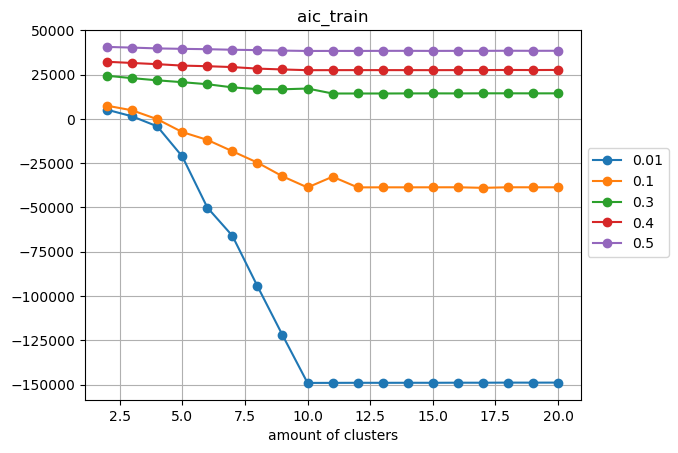

In [6]:
for std in [0.01, 0.1, 0.3, 0.4, 0.5]:
    plt.plot(res[std]['aic_train'].keys(), res[std]['aic_train'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('aic_train')
plt.grid()

Text(0.5, 1.0, 'aic_train - zoomed')

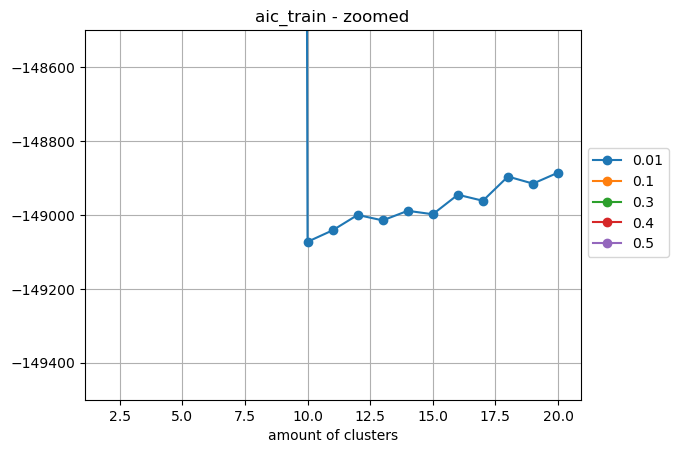

In [7]:
for std in [0.01, 0.1, 0.3, 0.4, 0.5]:
    plt.plot(res[std]['aic_train'].keys(), res[std]['aic_train'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.ylim(-149_500, -148_500)
plt.grid()
plt.xlabel('amount of clusters')
plt.title('aic_train - zoomed')

Text(0.5, 1.0, 'bic_train')

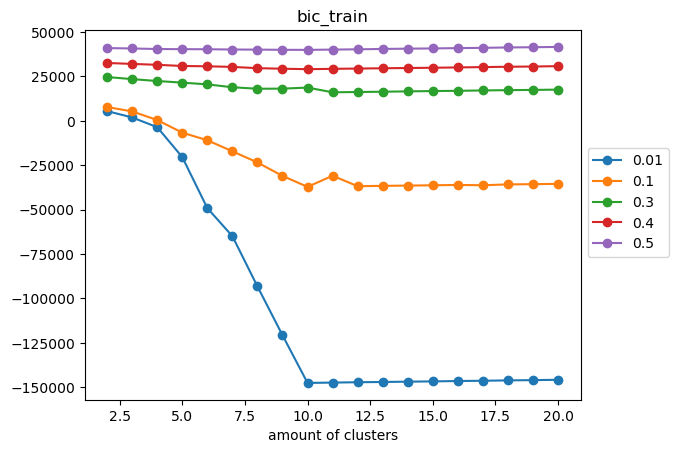

In [8]:
for std in [0.01, 0.1, 0.3, 0.4, 0.5]:
    plt.plot(res[std]['bic_train'].keys(), res[std]['bic_train'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('bic_train')

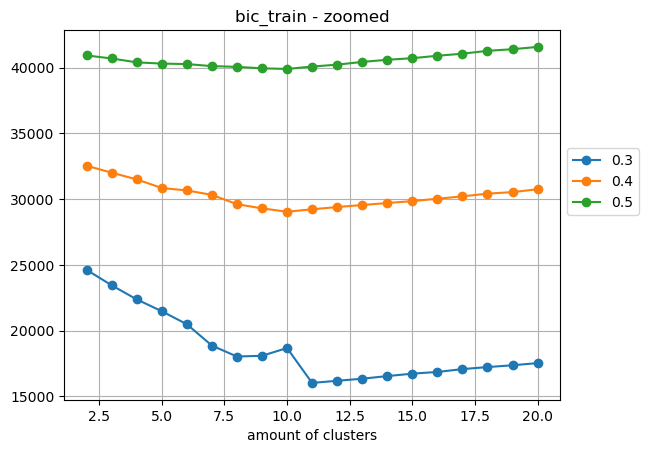

In [18]:
for std in [0.3, 0.4, 0.5]:
    plt.plot(res[std]['bic_train'].keys(), res[std]['bic_train'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('bic_train - zoomed')
plt.grid()

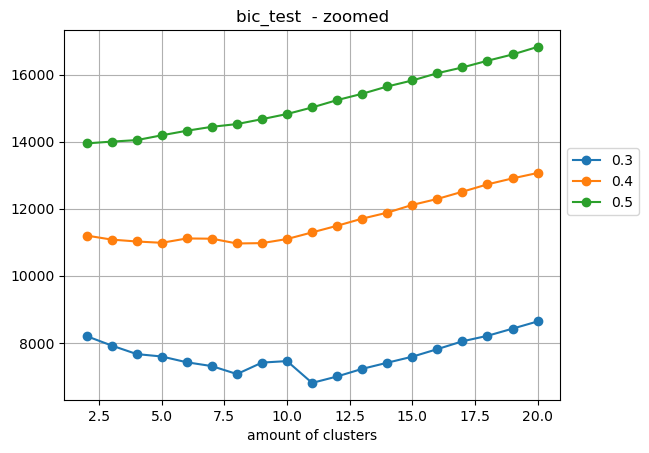

In [19]:
for std in [0.3, 0.4, 0.5]:
    plt.plot(res[std]['bic_test'].keys(), res[std]['bic_test'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('bic_test  - zoomed')
plt.grid()

In [16]:
res[std]['bic_train'].values()

dict_values([40917.8548987501, 40688.05929294322, 40394.277880136644, 40299.99918489851, 40262.598664428086, 40107.75028913518, 40051.221566700966, 39938.99168845247, 39892.2015001737, 40073.86661659066, 40218.772030898814, 40425.95143454596, 40589.575911368105, 40710.83370317392, 40894.23066602686, 41051.232783780615, 41268.922944821556, 41392.4431653482, 41566.56344462341])

In [13]:
res[std]['aic_train'].values()

dict_values([40608.30999391257, 40221.43189908365, 39770.56799725504, 39519.206812994875, 39324.72380350242, 39012.792939187486, 38799.18172773124, 38529.86936046071, 38325.99668315991, 38350.57931055484, 38338.40223584096, 38388.49915046607, 38395.041138266184, 38359.21644104997, 38385.530914880874, 38385.4505436126, 38446.05821563151, 38412.49594713612, 38429.5337373893])

(-148500.0, -144500.0)

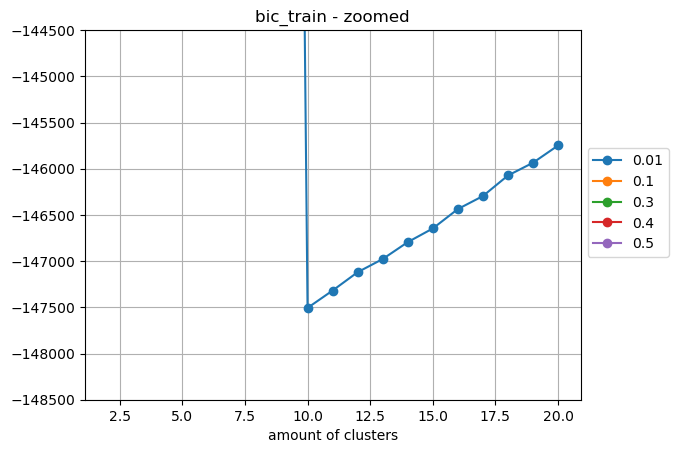

In [9]:
for std in [0.01, 0.1, 0.3, 0.4, 0.5]:
    plt.plot(res[std]['bic_train'].keys(), res[std]['bic_train'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('bic_train - zoomed')
plt.grid()
plt.ylim(-148_500, -144_500)

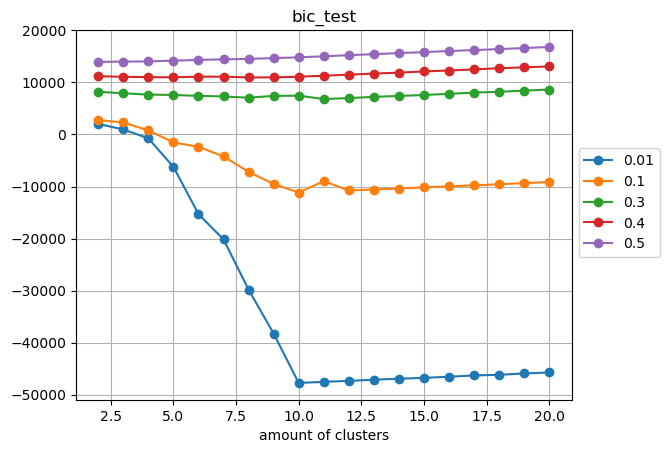

In [10]:
for std in [0.01, 0.1, 0.3, 0.4, 0.5]:
    plt.plot(res[std]['bic_test'].keys(), res[std]['bic_test'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('bic_test')
plt.grid()

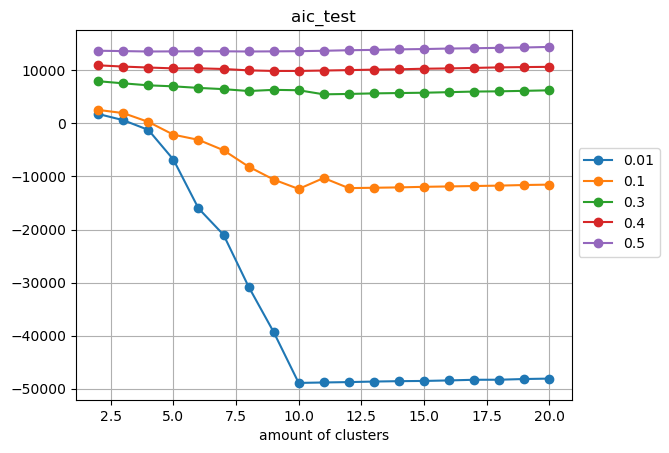

In [11]:
for std in [0.01, 0.1, 0.3, 0.4, 0.5]:
    plt.plot(res[std]['aic_test'].keys(), res[std]['aic_test'].values(), '-o', label=str(std))
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('aic_test')
plt.grid()

## Check how strong is the dataset size impact 

In [21]:
datasets = {}
for n_samples in tqdm([100, 500, 1000, 5_000, 10_000]):
    datasets[n_samples] = {}
    for std in [0.01, 0.1, 0.3, 0.4, 0.5]:
        latent_emb, labels = make_embeddings_and_labels(std, n_samples=n_samples,)
        datasets[n_samples][std] = test_kmean_and_metrics(latent_emb)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:25<00:00, 17.12s/it]


In [25]:
# datasets[n_samples][std]

Text(0.5, 0, 'amount of clusters')

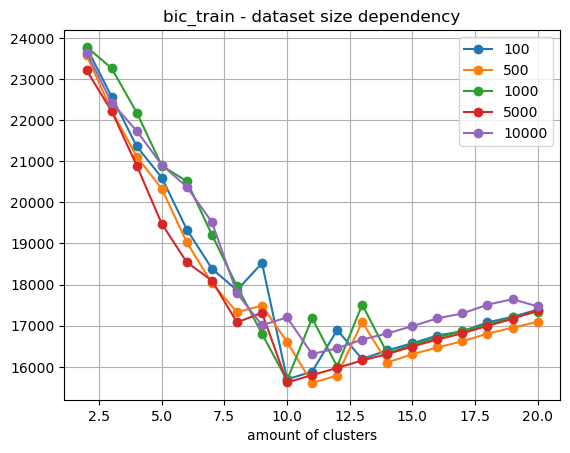

In [27]:
std = 0.3
for n_samples in [100, 500, 1000, 5_000, 10_000]:
    loc = datasets[n_samples][std]['bic_train']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(n_samples))
    
plt.grid()
plt.legend()
plt.title('bic_train - dataset size dependency')
plt.xlabel('amount of clusters')

Text(0.5, 0, 'amount of clusters')

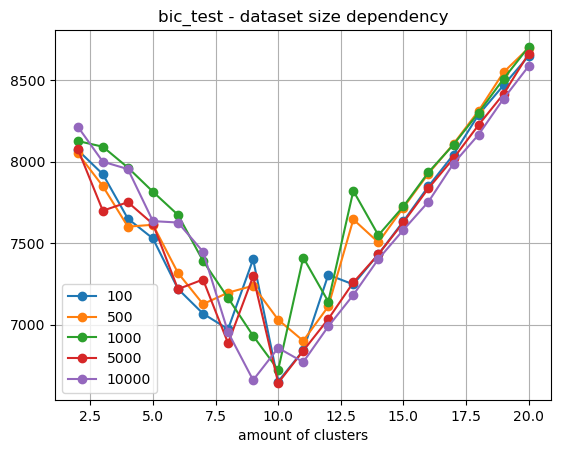

In [28]:
std = 0.3
for n_samples in [100, 500, 1000, 5_000, 10_000]:
    loc = datasets[n_samples][std]['bic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(n_samples))
    
plt.grid()
plt.legend()
plt.title('bic_test - dataset size dependency')
plt.xlabel('amount of clusters')

Text(0.5, 0, 'amount of clusters')

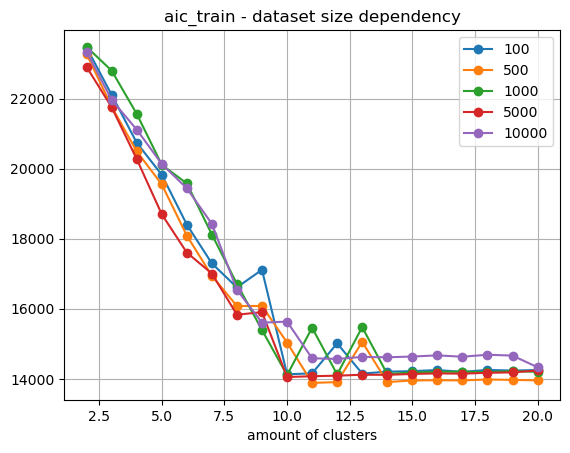

In [29]:
std = 0.3
for n_samples in [100, 500, 1000, 5_000, 10_000]:
    loc = datasets[n_samples][std]['aic_train']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(n_samples))
    
plt.grid()
plt.legend()
plt.title('aic_train - dataset size dependency')
plt.xlabel('amount of clusters')

Text(0.5, 0, 'amount of clusters')

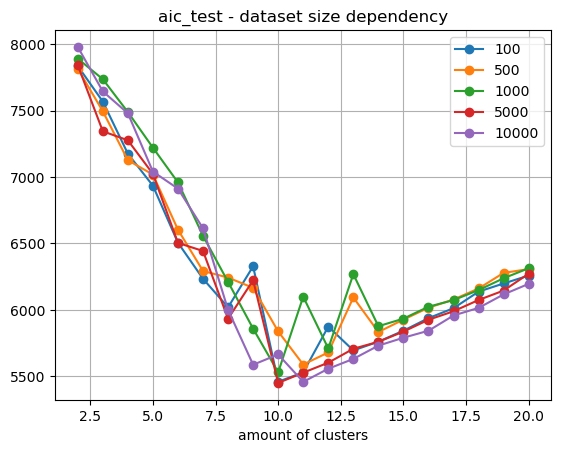

In [30]:
std = 0.3
for n_samples in [100, 500, 1000, 5_000, 10_000]:
    loc = datasets[n_samples][std]['aic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(n_samples))
    
plt.grid()
plt.legend()
plt.title('aic_test - dataset size dependency')
plt.xlabel('amount of clusters')

## Check how strong is the dataset dimensionality impact 

In [5]:
datasets = {}
std = 0.3
for n_samples in [100, 1000, 10_000]:
    datasets[n_samples] = {}
    for dim in tqdm([2, 4, 16, 32, 64, 128, 256, 512]):
        latent_emb, labels = make_embeddings_and_labels(std, n_samples=n_samples, dim=dim)
        datasets[n_samples][dim] = test_kmean_and_metrics(latent_emb)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.51it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 561.01it/s]


Text(0.5, 0, 'amount of clusters')

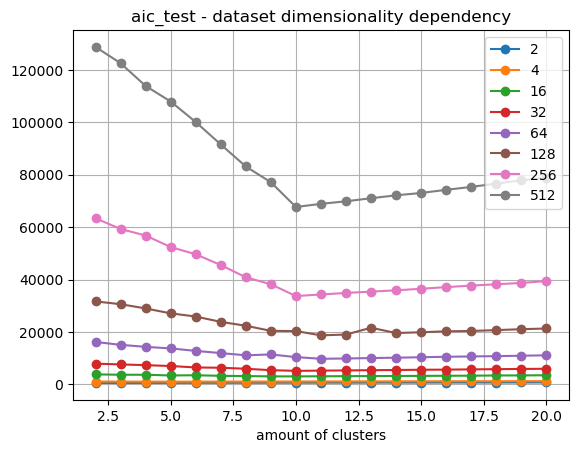

In [8]:
std = 0.3
n_samples = 10_000
for dim in tqdm([2, 4, 16, 32, 64, 128, 256, 512]):
    loc = datasets[n_samples][dim]['aic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(dim))
    
plt.grid()
plt.legend()
plt.title('aic_test - dataset dimensionality dependency')
plt.xlabel('amount of clusters')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 291.81it/s]


Text(0.5, 0, 'amount of clusters')

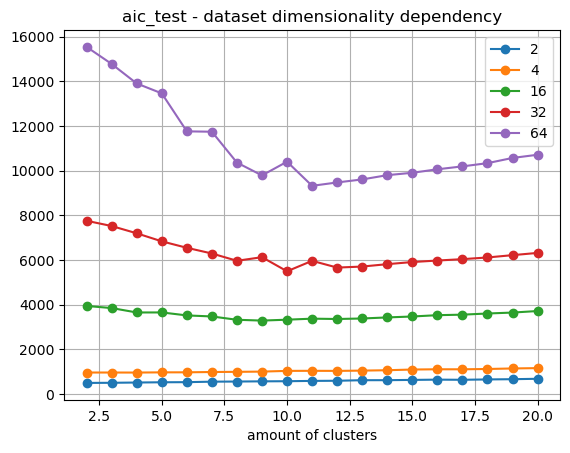

In [7]:
std = 0.3
n_samples = 10_000
for dim in tqdm([2, 4, 16, 32, 64]):
    loc = datasets[n_samples][dim]['aic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(dim))
    
plt.grid()
plt.legend()
plt.title('aic_test - dataset dimensionality dependency')
plt.xlabel('amount of clusters')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 242.03it/s]


Text(0.5, 0, 'amount of clusters')

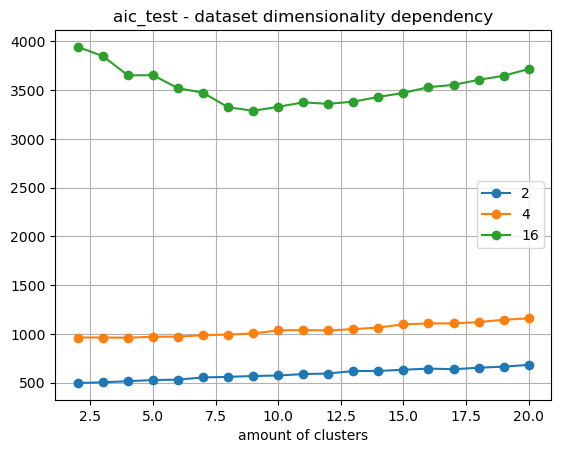

In [8]:
std = 0.3
n_samples = 10_000
for dim in tqdm([2, 4, 16]):
    loc = datasets[n_samples][dim]['aic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(dim))
    
plt.grid()
plt.legend()
plt.title('aic_test - dataset dimensionality dependency')
plt.xlabel('amount of clusters')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 656.55it/s]


Text(0.5, 0, 'amount of clusters')

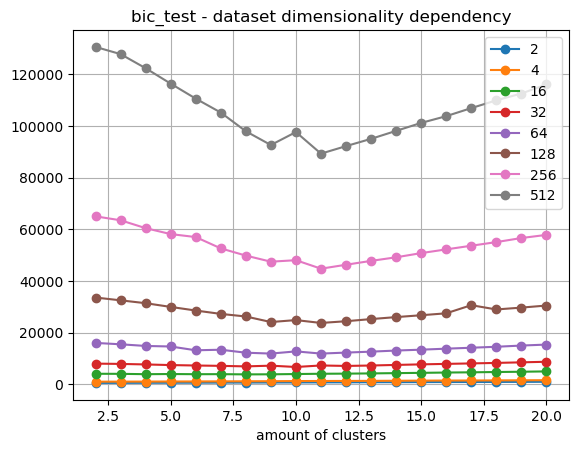

In [10]:
std = 0.3
n_samples = 10_000
for dim in tqdm([2, 4, 16, 32, 64, 128, 256, 512]):
    loc = datasets[n_samples][dim]['bic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(dim))
    
plt.grid()
plt.legend()
plt.title('bic_test - dataset dimensionality dependency')
plt.xlabel('amount of clusters')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 348.81it/s]


Text(0.5, 0, 'amount of clusters')

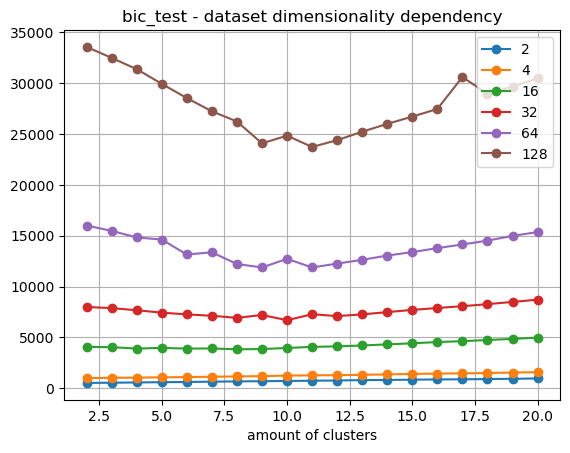

In [11]:
std = 0.3
n_samples = 10_000
for dim in tqdm([2, 4, 16, 32, 64, 128]):
    loc = datasets[n_samples][dim]['bic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(dim))
    
plt.grid()
plt.legend()
plt.title('bic_test - dataset dimensionality dependency')
plt.xlabel('amount of clusters')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 387.72it/s]


Text(0.5, 0, 'amount of clusters')

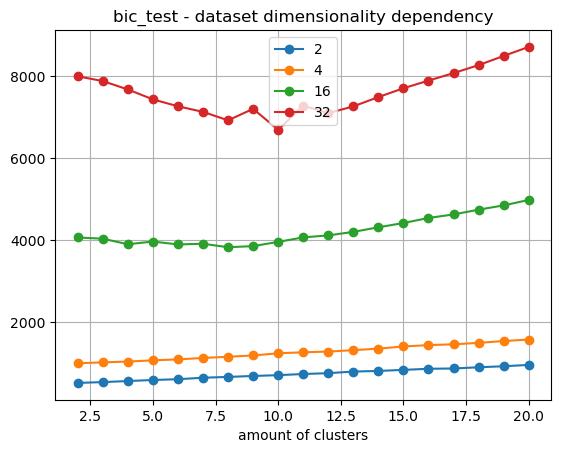

In [12]:
std = 0.3
n_samples = 10_000
for dim in tqdm([2, 4, 16, 32]):
    loc = datasets[n_samples][dim]['bic_test']
    plt.plot(loc.keys(), loc.values(), '-o', label=str(dim))
    
plt.grid()
plt.legend()
plt.title('bic_test - dataset dimensionality dependency')
plt.xlabel('amount of clusters')